# ET MCR Analysis subsection selection within stimulation regimen

#### Author: Youngbin Kim
#### Last Edited: June 2021

### Import Packages

In [1]:
# you might need to install libraries if you don't already have them

import millipillar as mp
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt
import plotly.express as px 
import os.path
import glob
import tkinter as tk
from tkinter import filedialog

### Import Stimulation Regimen

In [2]:
regimen = pd.read_excel('new regimen.xlsx')
regimen

,Start (s),Stop (s),Voltage (V),Freq (Hz),Period(s),Frame Start,Frame Stop
0,0.000,20,0.0,NaN,NaN,0,400
1,20.001,25,5.0,1.0,1.000000,401,500
2,25.001,30,4.5,1.0,1.000000,501,600
3,30.001,35,4.0,1.0,1.000000,601,700
4,35.001,40,3.5,1.0,1.000000,701,800
5,40.001,45,3.0,1.0,1.000000,801,900
6,45.001,50,2.5,1.0,1.000000,901,1000
7,50.001,55,2.0,1.0,1.000000,1001,1100
8,55.001,60,1.5,1.0,1.000000,1101,1200
9,60.001,65,1.0,1.0,1.000000,1201,1300


### Select folder containing videos to be analyzed

#### For ND2 files

In [3]:
# asks for file path of your video
root = tk.Tk()
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
folder_path = filedialog.askdirectory()
file_paths = glob.glob(os.path.join(folder_path, "**/*.nd2"), recursive=True)
print(len(file_paths), "files detected")

4 files detected


#### For tif files

In [3]:
# asks for file path of your video
root = tk.Tk()
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
folder_path = filedialog.askdirectory()
file_paths = glob.glob(os.path.join(folder_path, "**/*.tif"), recursive=True)
print(len(file_paths), "files detected")

2 folders with tif detected


### Batch analysis for 1Hz portion of regimen

### for nd2

In [4]:
#%%timeit
total_summary = pd.DataFrame()
traces = []
for file_path in file_paths:
    video = mp.Video(file_path, filetype="nd2")
    name = os.path.splitext(file_path.replace(folder_path+"\\", ""))[0]
    # modify the ranges below in "[1801:2200]" to get the desired subframes 
    trace = mp.Trace(data=video.trace[1801:2200], sampling_rate=video.frame_rate, name=name) 
    trace.analyze(baseline_fit="exp")
    traces.append(trace)
    trace_summary = trace.summary()
    trace_summary["trace"] = trace
    total_summary = total_summary.append(trace_summary)
    print("Processed", len(traces), "out of", len(file_paths), "videos.")
total_summary

C:\Users\Youngbin Lab\Google Drive\E\Columbia\GVN Lab\Summer 2021\millipillar code\etmcr.py:156: RuntimeWarning: invalid value encountered in power
  return A*np.exp(-(t/tau)**(1-beta))+cons
C:\Users\Youngbin Lab\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Processed 1 out of 4 videos.
Processed 2 out of 4 videos.
Processed 3 out of 4 videos.
Processed 4 out of 4 videos.


,num peaks,bpm,RMSSD,pRR50,max data,max df_f0,avg RR interval,avg tau,avg fwhm,avg contract50,...,avg relax90,SDRR,std tau,std fwhm,std contract50,std relax50,std fw90m,std contract90,std relax90,trace
1,5,15.191232,3.949805,None,501.171998,0.208530,3.949647,0.297050,0.440308,0.199925,...,0.520699,3.535218e-02,0.015871,0.001610,0.015890,0.015837,0.002044,0.014769,0.016243,<etmcr.Trace object at 0x0000019EC2772F70>
2,19,60.005366,0.999911,None,531.434460,0.194478,0.999911,0.264007,0.392922,0.183421,...,0.451240,0.000000e+00,0.001629,0.002728,0.002507,0.001325,0.003776,0.002332,0.002789,<etmcr.Trace object at 0x0000019EC21A8E50>
3,19,60.005368,0.999911,None,534.544171,0.181794,0.999911,0.259155,0.381714,0.177509,...,0.447399,0.000000e+00,0.002754,0.002465,0.002492,0.002126,0.006717,0.002230,0.006309,<etmcr.Trace object at 0x0000019EC34B7430>
4,20,60.005368,0.999911,None,547.829942,0.194619,0.999911,0.255029,0.363374,0.160480,...,0.435231,1.110223e-16,0.033226,0.040254,0.015704,0.024731,0.091858,0.024033,0.067944,<etmcr.Trace object at 0x0000019EC276A7C0>


### for tif videos

In [ ]:
from skimage import io

#%%timeit
total_summary = pd.DataFrame()
traces = []
for file_path in tif_directories:
    video = mp.Video(file_path, filetype="tif", frame_rate = 20)
    name = os.path.splitext(file_path.replace(folder_path+"\\", ""))[0]
    # modify the ranges below in "[1801:2200]" to get the desired subframes 
    trace = mp.Trace(data=video.trace[1801:2200], sampling_rate=video.frame_rate, name=name)
    trace.analyze(baseline_fit="exp")
    traces.append(trace)
    trace_summary = trace.summary()
    trace_summary["trace"] = trace
    total_summary = total_summary.append(trace_summary)
    print("Processed", len(traces), "out of", len(file_paths), "videos.")
total_summary

### Analysis Visualization

In [17]:
#looking at a sample peak_summary for one of the traces
df_f0 = pd.DataFrame([t.df_f0 for t in total_summary["trace"]])
df_f0.index = total_summary.index

d13\b_1_stim_cal


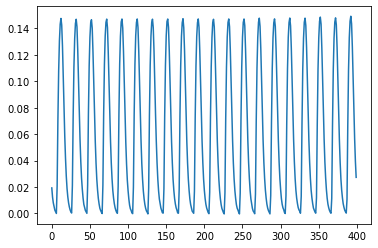

d13\b_2_stim_cal


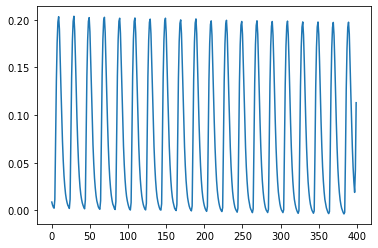

d13\b_3_stim_cal


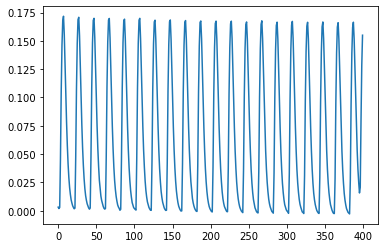

d13\b_4_stim_cal


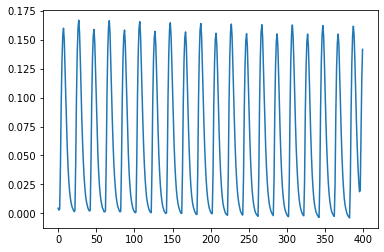

d13\w_2_stim_cal


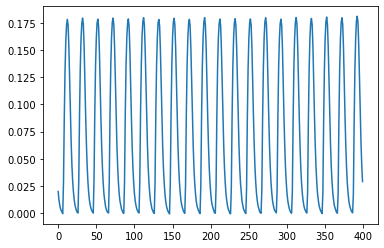

d13\w_3_stim_cal


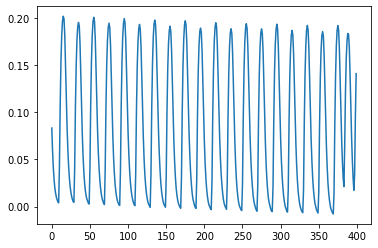

d13\w_4_stim_cal


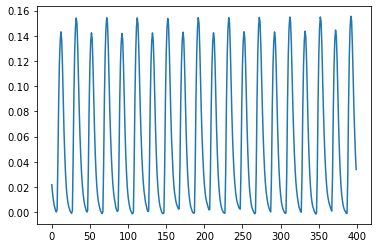

d6\b_1_cal


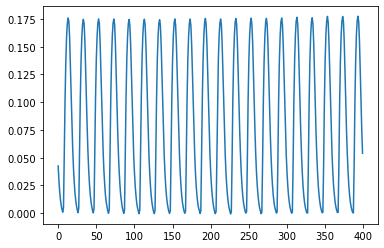

d6\b_2_cal


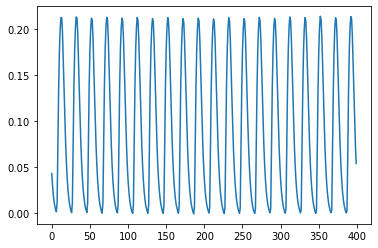

d6\b_3_cal


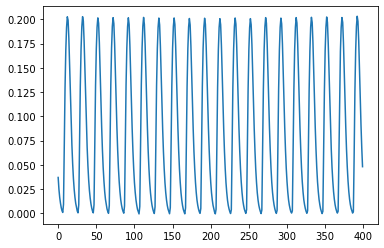

d6\b_4_cal


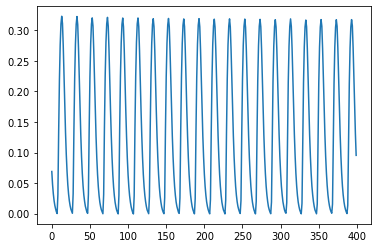

d6\b_5_cal


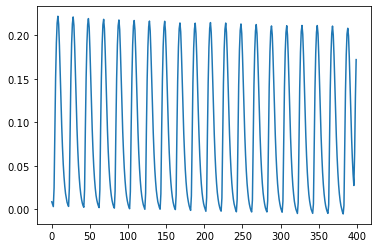

d6\w_1_cal


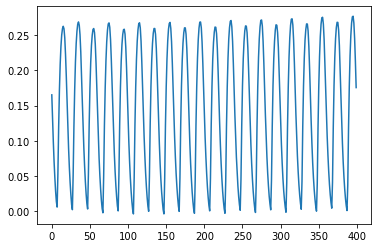

d6\w_2_cal


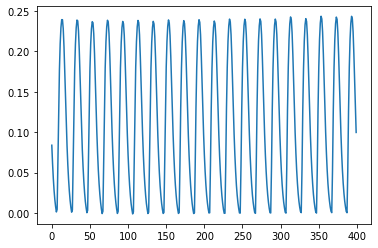

d6\w_3_cal


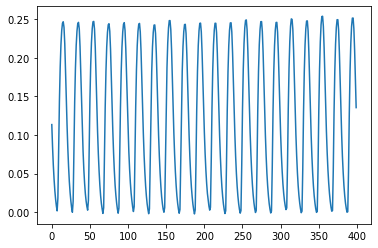

d6\w_4_cal


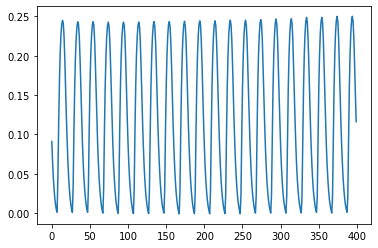

d6\w_5_cal


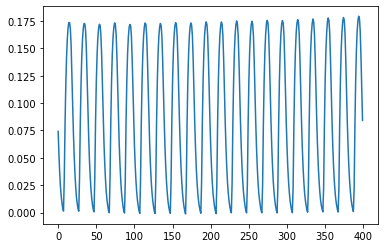

In [18]:
for d in df_f0.index:
    print(d)
    plt.plot(df_f0.loc[d])
    plt.show()

## Save output
### saves in folder selected in the beginning

In [19]:
total_summary.to_csv(os.path.join(folder_path, "1Hz summary.csv"))
df_f0.to_csv(os.path.join(folder_path, "1Hz df_f0 trace.csv"))

### Save individual peak data for each video
#### more comprehensive data about each peak is saved in file location

In [23]:
def save_row_peak_summary(row):
    file_name = os.path.join(folder_path,"analysis", row.name+"_batch_1Hz_stim.csv")
    if not os.path.exists(os.path.dirname(file_name)):
        os.makedirs(os.path.dirname(file_name))
    row.peak_summary().to_csv(file_name)

total_summary['trace'].apply(save_row_peak_summary);